In [1]:
import datetime as dt

import scipy as sp
import numpy as np

from bokeh.io import output_notebook
from bokeh.layouts import row, column, gridplot
from bokeh.plotting import show

from ch2.data import *
from ch2.lib import *

s = session('-v5')

    INFO: Using database at /home/andrew/.ch2/database.sqlr


In [2]:
df = statistics(s, POWER, POWER_HR, POWER_HR_LAG, WIND_SPEED, WIND_HEADING)
df.describe()

,Power
count,3212.000000
mean,58.843351
std,84.747073
min,0.000000
25%,0.000000
50%,0.000000
75%,107.157888
max,816.036937


In [3]:
clean = df.loc[(df[POWER_HR] > 0) & (df[POWER_HR] < 1000) & (df[POWER_HR_LAG] > -10) & (df[POWER_HR_LAG] < 100)]
clean['slope'] = 60 / clean[POWER_HR]
clean.describe()

/home/andrew/project/ch2/choochoo/env/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Power,Wind Speed,Wind Heading,Power / HR Lag,Power / HR,slope
count,113.0,115.000000,115.000000,115.000000,115.000000,115.000000
mean,0.0,2.435264,195.769834,23.365217,278.931475,0.231155
std,0.0,2.459780,92.286164,4.636488,73.632765,0.066172
min,0.0,0.022484,3.518655,12.000000,114.081942,0.121627
25%,0.0,0.899718,120.022265,20.000000,227.226726,0.188709
50%,0.0,1.673345,204.898315,24.000000,270.077851,0.222158
75%,0.0,3.066631,265.340590,27.000000,317.972892,0.264055
max,0.0,14.338972,357.148228,30.000000,493.309556,0.525938


count    115.000000
mean     278.931475
std       73.632765
min      114.081942
25%      227.226726
50%      270.077851
75%      317.972892
max      493.309556
Name: Power / HR, dtype: float64
Power / HR 263.59574820567906


<IPython.core.display.Javascript object>


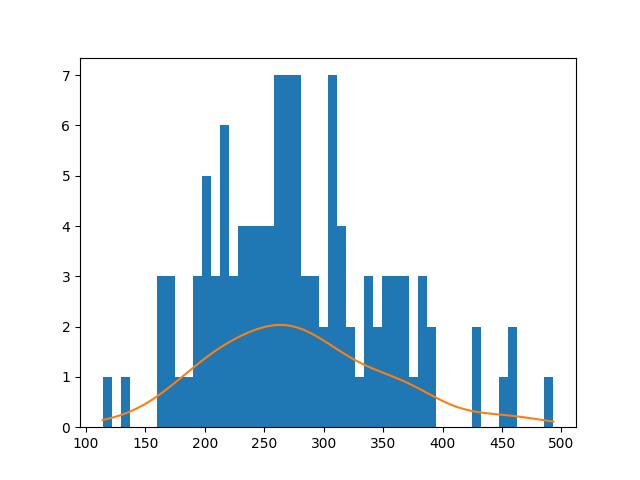

count    115.000000
mean       0.231155
std        0.066172
min        0.121627
25%        0.188709
50%        0.222158
75%        0.264055
max        0.525938
Name: slope, dtype: float64
slope 0.21163502430595432


<IPython.core.display.Javascript object>


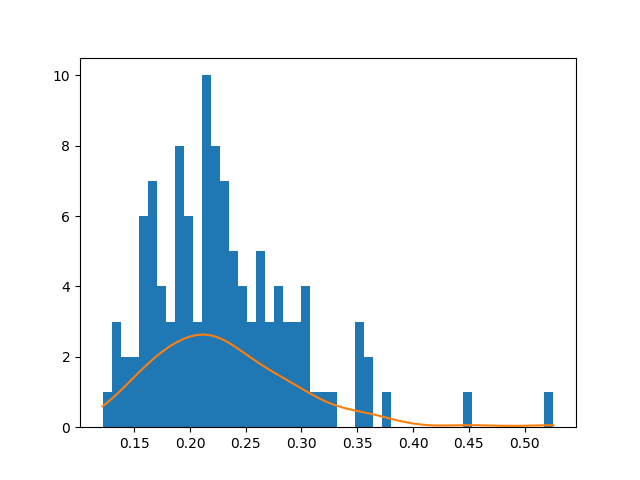

count    115.000000
mean      23.365217
std        4.636488
min       12.000000
25%       20.000000
50%       24.000000
75%       27.000000
max       30.000000
Name: Power / HR Lag, dtype: float64
Power / HR Lag 24.588100946859903


<IPython.core.display.Javascript object>


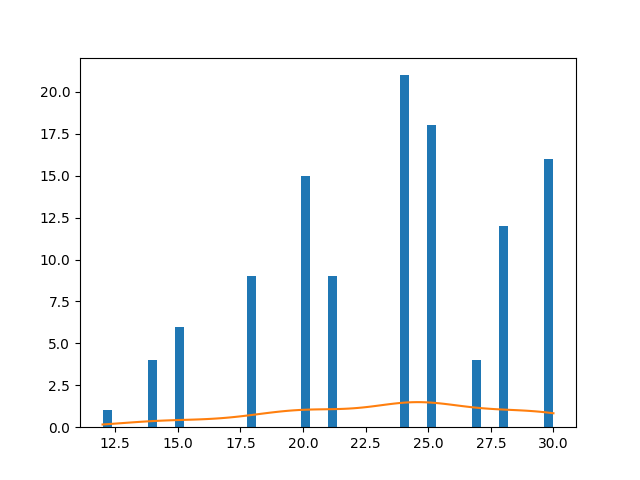

count    115.000000
mean       2.435264
std        2.459780
min        0.022484
25%        0.899718
50%        1.673345
75%        3.066631
max       14.338972
Name: Wind Speed, dtype: float64
Wind Speed 1.8266429285978076


<IPython.core.display.Javascript object>


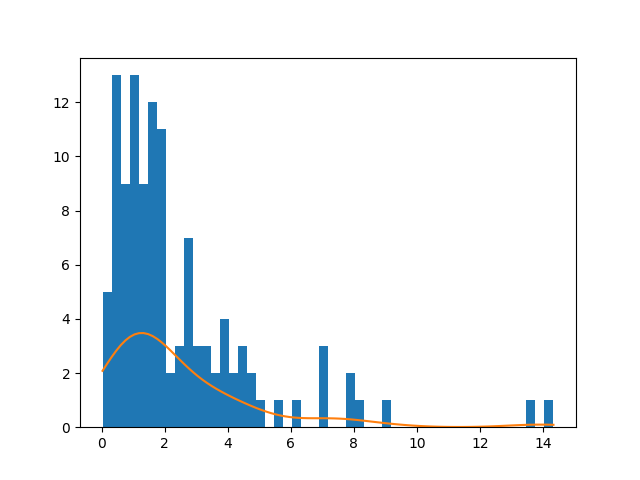

count    115.000000
mean     195.769834
std       92.286164
min        3.518655
25%      120.022265
50%      204.898315
75%      265.340590
max      357.148228
Name: Wind Heading, dtype: float64
Wind Heading 233.96639728067004


<IPython.core.display.Javascript object>


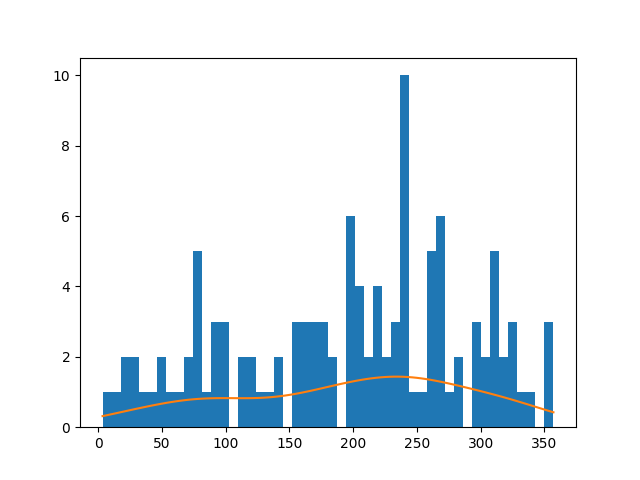

In [4]:
%matplotlib notebook
import matplotlib.pyplot as plt

def find_max(kde, guess, lo=None, hi=None, dx_min=1e-3, samples=10):
    if lo is None: lo = 0.8 * guess
    if hi is None: hi = 1.2 * guess
    dx = hi - lo
    while dx > dx_min:
        x = np.linspace(lo, hi, samples)
        y = kde(x)
        guess = x[np.argmax(y)]
        lo = guess - dx / samples
        hi = guess + dx / samples
        dx = hi - lo
    return guess

for name in (POWER_HR, 'slope', POWER_HR_LAG, WIND_SPEED, WIND_HEADING):
    print(clean[name].describe())
    mn, mx = min(clean[name].dropna()), max(clean[name].dropna())
    x = np.linspace(mn, mx, 100)
    kde = sp.stats.gaussian_kde(clean[name])
    print(name, find_max(kde, clean[name].mean()))
    plt.figure()
    plt.hist(clean[name], bins=50)
    plt.plot(x, kde(x) * (mx - mn))
    plt.show()


In [5]:
clean.loc[clean[WIND_SPEED] > 7]

,Power,Wind Speed,Wind Heading,Power / HR Lag,Power / HR,slope
2016-09-01 11:22:30+00:00,0.0,7.019100,77.767925,15.0,259.132590,0.231542
2017-02-07 10:18:50+00:00,0.0,9.162713,234.958889,27.0,265.941525,0.225614
2017-03-21 10:13:25+00:00,0.0,7.755944,228.674096,27.0,197.867619,0.303233
2017-04-04 10:38:06+00:00,0.0,14.338972,242.772358,21.0,394.011377,0.152280
2017-04-06 10:13:29+00:00,0.0,7.063481,180.521274,24.0,284.056308,0.211226
2017-05-03 11:05:21+00:00,0.0,8.146159,229.276602,27.0,259.178871,0.231500
2017-09-11 12:23:27+00:00,0.0,13.526520,158.535236,24.0,236.728013,0.253455
2017-12-29 09:45:48+00:00,0.0,7.782350,340.021103,24.0,294.976207,0.203406
